<a href="https://colab.research.google.com/github/Wapsop/Redes-neuronales-1/blob/main/Red_Neuronal_Multicapa_Videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Videojuegos

In [9]:
import numpy as np
import pandas as pd

# ========== CONJUNTO DE DATOS ========== (Evaluación de Videojuegos)
# Generar dataset de 2000 videojuegos para evaluación de éxito
n_muestras = 2000

# Habilidades de desarrollo del juego (rango: 60-95)
desarrollo_juego = np.random.randint(60, 96, (n_muestras, 6))

# Habilidades de marketing y lanzamiento (rango: 55-90)
mercado_lanzamiento = np.random.randint(55, 91, (n_muestras, 6))

# Habilidades de soporte post-lanzamiento (rango: 50-85)
post_lanzamiento_soporte = np.random.randint(50, 86, (n_muestras, 6))

# Nombres de columnas específicas para evaluación de videojuegos
columnas = [
    # Habilidades de desarrollo del juego
    'calidad_graficos', 'jugabilidad', 'historia_narrativa', 'innovacion_mecanicas', 'diseño_sonido', 'optimizacion_rendimiento',
    # Habilidades de marketing y lanzamiento
    'estrategia_marketing', 'presupuesto_publicidad', 'analisis_competencia', 'comunidad_engagement', 'precio_juego', 'lanzamiento_plataformas',
    # Habilidades de soporte post-lanzamiento
    'actualizaciones_contenido', 'soporte_tecnico', 'gestion_errores', 'comunicacion_jugadores', 'monetizacion_sostenible', 'expansion_dlc'
]

# Crear DataFrame con los 2500 videojuegos
df = pd.DataFrame(np.concatenate([desarrollo_juego, mercado_lanzamiento, post_lanzamiento_soporte], axis=1), columns=columnas)

# ========== PREPARACIÓN DE ETIQUETAS ========== (Éxito del Videojuego)
# Calcular promedio por grupo y promedio total
prom_desarrollo = df[['calidad_graficos', 'jugabilidad', 'historia_narrativa', 'innovacion_mecanicas', 'diseño_sonido', 'optimizacion_rendimiento']].mean(axis=1)
prom_mercado = df[['estrategia_marketing', 'presupuesto_publicidad', 'analisis_competencia', 'comunidad_engagement', 'precio_juego', 'lanzamiento_plataformas']].mean(axis=1)
prom_post_lanzamiento = df[['actualizaciones_contenido', 'soporte_tecnico', 'gestion_errores', 'comunicacion_jugadores', 'monetizacion_sostenible', 'expansion_dlc']].mean(axis=1)

# Promedio total = promedio de los 3 promedios
prom_total = (prom_desarrollo + prom_mercado + prom_post_lanzamiento) / 3

# Etiqueta: 1 = exitoso si promedio total > 70 (ajustado para el nuevo rango de habilidades)
y = (prom_total > 70).astype(int)

# one-hot encoding: convierte [0,1] en [[1,0], [0,1]]
y = pd.get_dummies(y).values
df

,calidad_graficos,jugabilidad,historia_narrativa,innovacion_mecanicas,diseño_sonido,optimizacion_rendimiento,estrategia_marketing,presupuesto_publicidad,analisis_competencia,comunidad_engagement,precio_juego,lanzamiento_plataformas,actualizaciones_contenido,soporte_tecnico,gestion_errores,comunicacion_jugadores,monetizacion_sostenible,expansion_dlc
0,89,94,73,71,88,86,57,59,76,60,86,64,71,65,60,73,80,79
1,80,63,93,92,68,93,90,58,85,87,73,74,67,57,51,62,67,83
2,95,79,77,95,91,67,89,68,88,63,64,88,82,60,75,63,75,81
3,69,86,82,85,64,73,73,88,76,71,64,81,56,74,60,64,78,73
4,73,85,66,72,68,93,65,79,60,85,89,89,61,75,81,74,53,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,78,83,79,87,85,60,65,79,58,89,67,61,74,61,55,56,62,57
1996,89,62,87,91,81,87,64,76,74,86,68,87,70,60,63,68,69,77
1997,69,71,78,94,80,86,60,68,85,57,83,58,66,70,66,61,81,83
1998,73,83,77,82,69,87,82,84,67,83,88,90,80,84,85,67,76,70


In [11]:
# ========== DIVISIÓN DE DATOS ==========
from sklearn.model_selection import train_test_split
# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

In [12]:
# ========== escalonar ==========
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Estandarizar datos para mejor rendimiento de la red
X_train = scaler.fit_transform(X_train)  # Aprende y transforma entrenamiento
X_test = scaler.transform(X_test)        # Aplica misma transformación a prueba

In [13]:
# ========== RED NEURONAL ==========
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear modelo de red neuronal secuencial
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Capa entrada + oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(16, activation='relu'),  # Capa oculta 3
    Dense(2, activation='softmax') # Capa salida (2)
])

# Configurar optimizador Adam
adam = Adam(learning_rate=0.001)

# Compilar modelo: definir cómo aprende
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# ========== ENTRENAMIENTO ==========
history = modelo.fit(
    X_train, y_train,
    epochs=85,           # 100 pasadas completas por los datos
    batch_size=32,        # Procesa 32 muestras por lote
    validation_data=(X_test, y_test),  # Datos para validar durante entrenamiento
    verbose=1             # Muestra progreso
)

Epoch 1/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6846 - loss: 0.5696 - val_accuracy: 0.8425 - val_loss: 0.3425
Epoch 2/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.3023 - val_accuracy: 0.9175 - val_loss: 0.2295
Epoch 3/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9314 - loss: 0.1820 - val_accuracy: 0.9400 - val_loss: 0.1533
Epoch 4/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9687 - loss: 0.1098 - val_accuracy: 0.9500 - val_loss: 0.1225
Epoch 5/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0739 - val_accuracy: 0.9625 - val_loss: 0.1041
Epoch 6/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.0602 - val_accuracy: 0.9550 - val_loss: 0.1045
Epoch 7/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0466 - val_accuracy: 0.9600 - val_loss: 0.0896
Epoch 8/85
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0416 - val_accuracy: 0.9600 - val_loss:

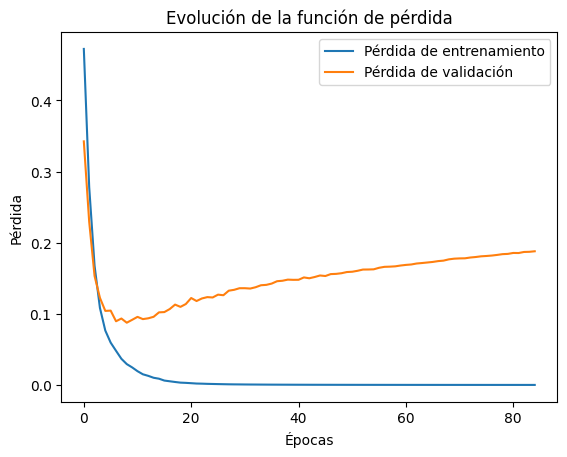

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.1523     

Loss: 0.1880  |  Accuracy: 0.9650


In [15]:
# ========== MÉTRICAS Y EVALUACIÓN ==========
import matplotlib.pyplot as plt

# Graficar evolución de la pérdida durante entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

# Evaluar modelo final con datos de prueba
loss, acc = modelo.evaluate(X_test, y_test)
print(f"\nLoss: {loss:.4f}  |  Accuracy: {acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


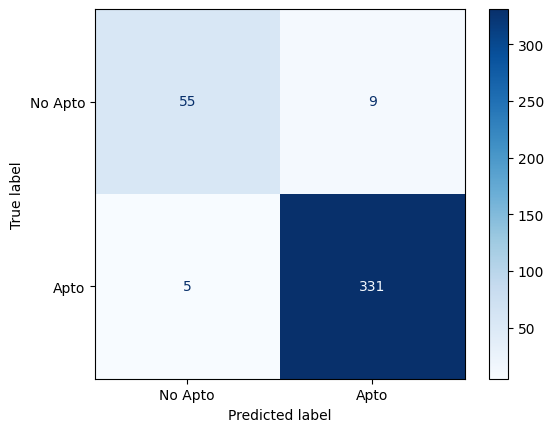


Sensitivity (Recall) por clase:
No Apto: 0.86
Apto: 0.99


In [16]:
# ========== MATRIZ DE CONFUSIÓN ==========
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Predecir con el modelo entrenado
pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)  # Convertir probabilidades a clases (0 o 1)
y_true = np.argmax(y_test, axis=1)  # Convertir one-hot a clases

# Crear y mostrar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

# Calcular sensibilidad (recall) por clase
sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [18]:
# ========== ENCONTRAR AL MEJOR JUEGO ==========

# Usar solo los datos de prueba (X_test, y_test)
# Primero necesitamos revertir el escalado para obtener los valores originales
X_test_original = scaler.inverse_transform(X_test)

# Crear DataFrame con los datos de test originales
df_test = pd.DataFrame(X_test_original, columns=columnas)

# Calcular promedio total de habilidades para cada videojuego en TEST
promedio_habilidades_test = df_test.mean(axis=1)

# Encontrar el índice del videojuego con mayor promedio en TEST
indice_mejor_test = promedio_habilidades_test.idxmax()

# Obtener el videojuego más apto del conjunto de TEST
mejor_candidato_test = df_test.loc[indice_mejor_test]

# Mostrar resultados del MEJOR en TEST
print(f" MEJOR VIDEOJUEGO EN DATOS DE PRUEBA:")
print(f" Puntuación Total: {promedio_habilidades_test.max():.1f}")
print(f" Clasificación Real: {'Apto' if y_test[indice_mejor_test].argmax() == 1 else 'No Apto'}")
print(f" Predicción del Modelo: {'Apto' if modelo.predict(X_test)[indice_mejor_test].argmax() == 1 else 'No Apto'}")

print("\n HABILIDADES DESTACADAS:")
print(f"   Desarrollo: {df_test[['calidad_graficos', 'jugabilidad', 'historia_narrativa', 'innovacion_mecanicas', 'diseño_sonido', 'optimizacion_rendimiento']].mean(axis=1)[indice_mejor_test]:.1f}")
print(f"   Marketing: {df_test[['estrategia_marketing', 'presupuesto_publicidad', 'analisis_competencia', 'comunidad_engagement', 'precio_juego', 'lanzamiento_plataformas']].mean(axis=1)[indice_mejor_test]:.1f}")
print(f"   Post-Lanzamiento: {df_test[['actualizaciones_contenido', 'soporte_tecnico', 'gestion_errores', 'comunicacion_jugadores', 'monetizacion_sostenible', 'expansion_dlc']].mean(axis=1)[indice_mejor_test]:.1f}")

 MEJOR VIDEOJUEGO EN DATOS DE PRUEBA:
 Puntuación Total: 78.7
 Clasificación Real: Apto
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 Predicción del Modelo: Apto

 HABILIDADES DESTACADAS:
   Desarrollo: 78.7
   Marketing: 76.2
   Post-Lanzamiento: 81.2
